# STAT3612 Lecture 4 - Feature Engineering

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](http://www.statsoft.org/teaching/stat3612/)

27 September 2019

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


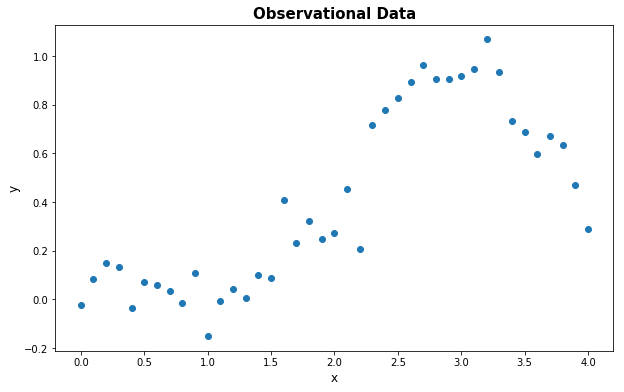

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision =4)

def ffun(x):
    return np.exp(-(x-3)**2)

x = np.linspace(0, 4, 41)
print(x)
np.random.seed(2019)
y = ffun(x) + 0.1*np.random.normal(0, 1, len(x))

plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Observational Data', fontsize=15, fontweight="bold")
plt.show()

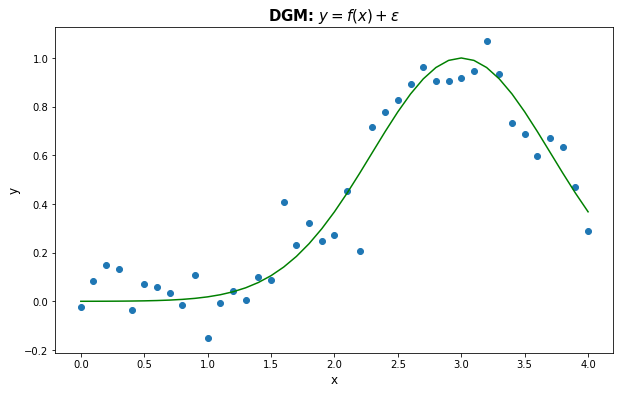

In [2]:
plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.plot(x, ffun(x), color="green")
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('DGM: $y=f(x)+\epsilon$', fontsize=15, fontweight="bold")
plt.show()

# Polynomial Regression

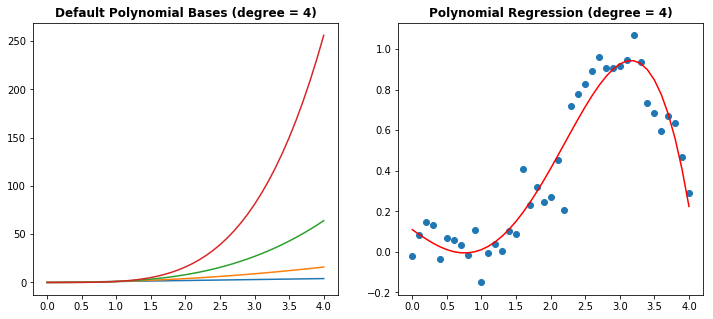

Correlation Matrix:
 [[1.     0.9668 0.9141 0.8633]
 [0.9668 1.     0.9859 0.9581]
 [0.9141 0.9859 1.     0.9921]
 [0.8633 0.9581 0.9921 1.    ]]


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

PolyBasis = PolynomialFeatures(degree=4, include_bias=False)
xphi = PolyBasis.fit_transform(x.reshape([-1,1]))
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Default Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()
print('Correlation Matrix:\n', np.corrcoef(xphi.transpose()))

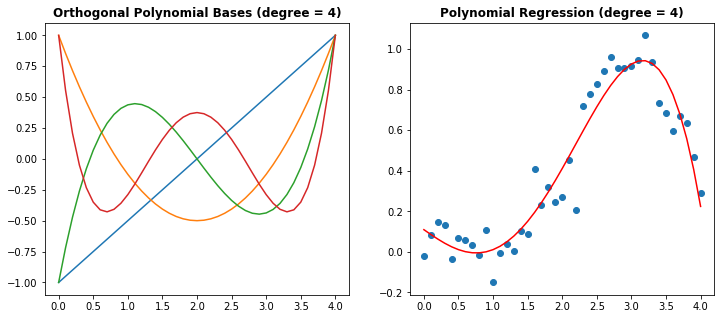

Correlation Matrix:
 [[1.     0.     0.107  0.    ]
 [0.     1.     0.     0.1523]
 [0.107  0.     1.     0.    ]
 [0.     0.1523 0.     1.    ]]


In [4]:
from sympy import *

order = 4
xphi = np.zeros((x.shape[0], order))
x0 = np.linspace(-1, 1, x.shape[0])
for j in range(order):
    xphi[:,j] = [legendre(j+1,x1) for x1 in x0]

linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Orthogonal Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()
print('Correlation Matrix:\n', np.corrcoef(xphi.transpose()))

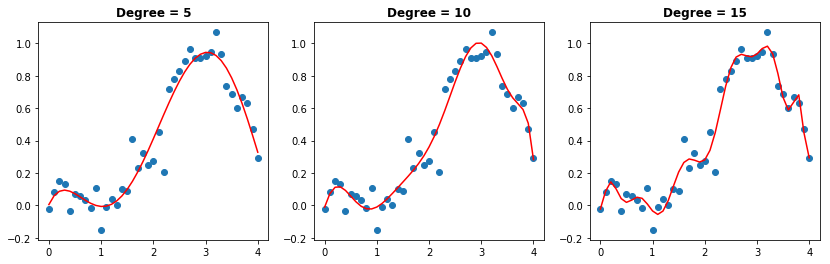

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
x0 = np.linspace(-1, 1, x.shape[0])
order = (5,10,15)
for k in range(len(order)):
    xphi = np.zeros((x.shape[0], order[k]))
    for j in range(order[k]):
        xphi[:,j] = [legendre(j+1,x1) for x1 in x0]
    linreg = LinearRegression()
    linreg.fit(xphi, y)
    yfit = linreg.predict(xphi)
    axs[k].plot(x, y, 'o')
    axs[k].plot(x, yfit, color="red")
    axs[k].set_title('Degree = ' + str(order[k]), fontweight="bold")
plt.show()

# Linear Splines

In [6]:
def PieceReLU(x, tau):
    xphi = x
    for k in range(len(tau)):
        tmp = [max(x1-tau[k], 0) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    return xphi

def PieceLinearSpline(x, tau):
    xphi = [min(max(x1-min(x), 0), tau[0]-min(x)) for x1 in x]
    for k in range(1,len(tau)):
        tmp = [min(max(x1-tau[k-1], 0), tau[k]-tau[k-1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [max(x1-tau[len(tau)-1], 0) for x1 in x]))
    return xphi

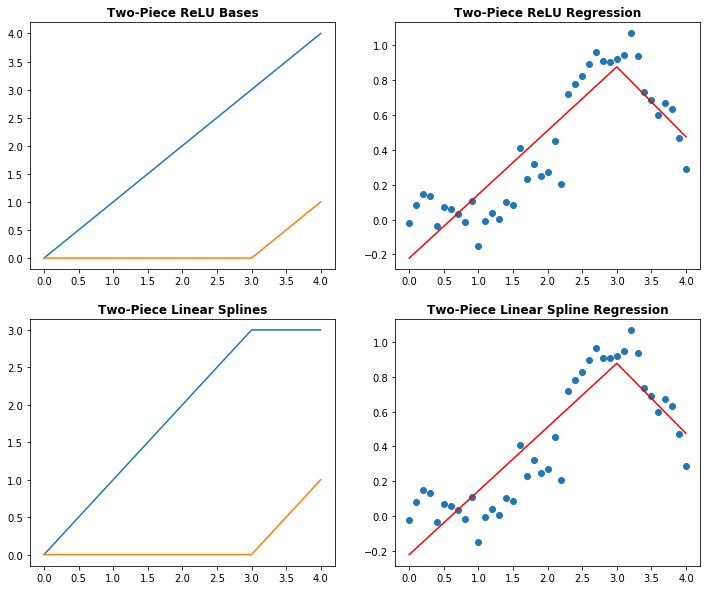

In [7]:
tau=[3]
linreg = LinearRegression()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
xphi = PieceReLU(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,0].plot(x, xphi)
axs[0,0].set_title('Two-Piece ReLU Bases', fontweight="bold")
axs[0,1].plot(x, y, 'o')
axs[0,1].plot(x, yfit, color="red")
axs[0,1].set_title('Two-Piece ReLU Regression', fontweight="bold")

xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,0].plot(x, xphi)
axs[1,0].set_title('Two-Piece Linear Splines', fontweight="bold")
axs[1,1].plot(x, y, 'o')
axs[1,1].plot(x, yfit, color="red")
axs[1,1].set_title('Two-Piece Linear Spline Regression', fontweight="bold")
plt.show()

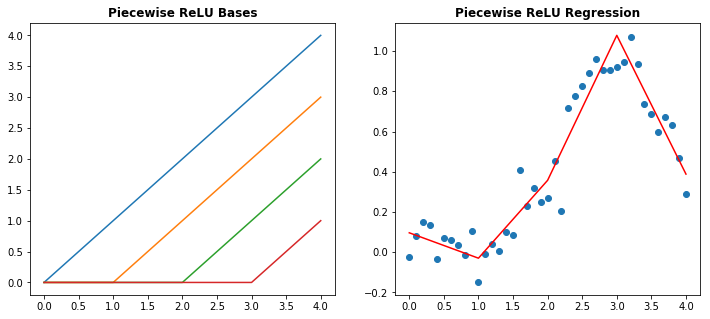

Correlation Matrix: 
 [[1.     0.9808 0.8943 0.6996]
 [0.9808 1.     0.9449 0.755 ]
 [0.8943 0.9449 1.     0.8742]
 [0.6996 0.755  0.8742 1.    ]]


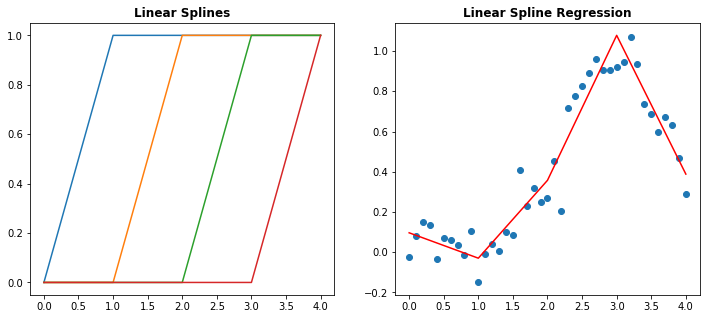

Correlation Matrix: 
 [[1.     0.686  0.417  0.2371]
 [0.686  1.     0.7334 0.417 ]
 [0.417  0.7334 1.     0.686 ]
 [0.2371 0.417  0.686  1.    ]]


In [8]:
tau=[1, 2, 3]
linreg = LinearRegression()

xphi = PieceReLU(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Piecewise ReLU Bases', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Piecewise ReLU Regression', fontweight="bold")
plt.show()
print('Correlation Matrix: \n', np.corrcoef(xphi.transpose()))

xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Linear Splines', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Linear Spline Regression', fontweight="bold")
plt.show()
print('Correlation Matrix: \n', np.corrcoef(xphi.transpose()))

# B-Splines

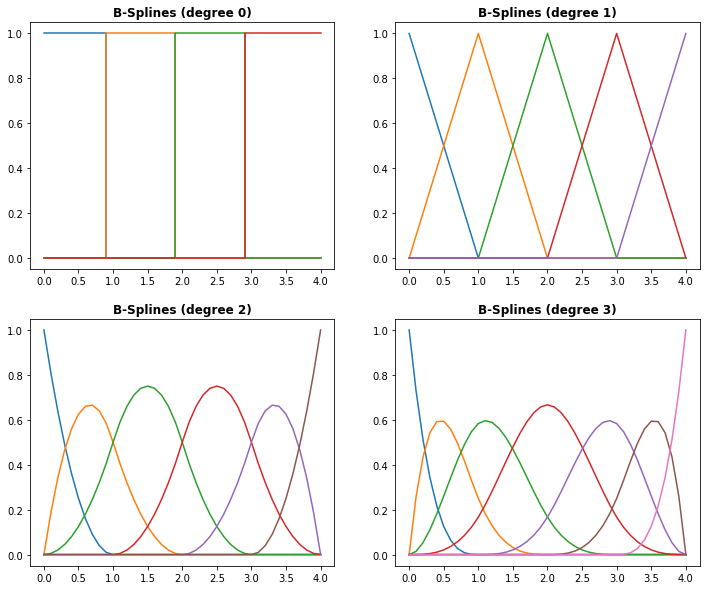

In [9]:
from patsy import dmatrix

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
xphi = dmatrix("bs(x, df=4, degree=0, include_intercept=True) - 1", {"x": x})
axs[0,0].step(x, xphi)
axs[0,0].set_title('B-Splines (degree 0)', fontweight="bold")

xphi = dmatrix("bs(x, df=5, degree=1, include_intercept=True) - 1", {"x": x})
axs[0,1].plot(x, xphi)
axs[0,1].set_title('B-Splines (degree 1)', fontweight="bold")

xphi = dmatrix("bs(x, df=6, degree=2, include_intercept=True) - 1", {"x": x})
axs[1,0].plot(x, xphi)
axs[1,0].set_title('B-Splines (degree 2)', fontweight="bold")

xphi = dmatrix("bs(x, df=7, degree=3, include_intercept=True) - 1", {"x": x})
axs[1,1].plot(x, xphi)
axs[1,1].set_title('B-Splines (degree 3)', fontweight="bold")
plt.show()

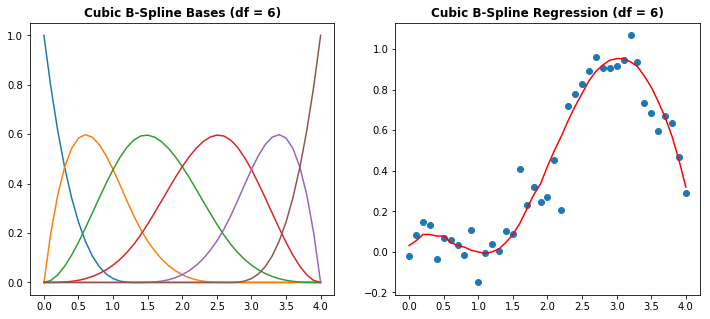

In [10]:
xphi = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Cubic B-Spline Bases (df = 6)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Cubic B-Spline Regression (df = 6)', fontweight="bold")
plt.show()

# Natural Cubic Splines

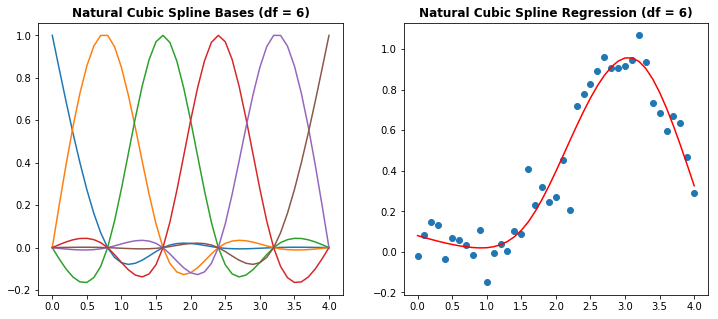

In [11]:
xphi = dmatrix("cr(x, df=6) - 1", {"x": x})
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Natural Cubic Spline Bases (df = 6)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Natural Cubic Spline Regression (df = 6)', fontweight="bold")
plt.show()

# Experiment with Doppler Example

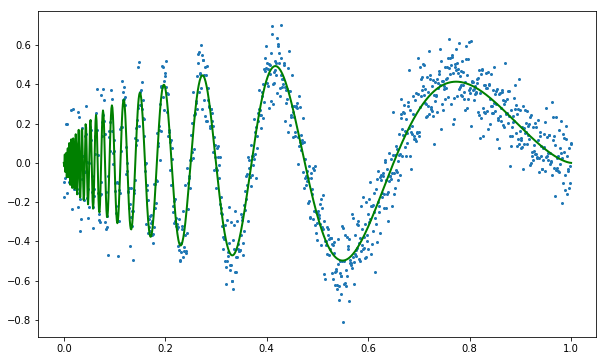

In [12]:
def doppler(DataNum, noise_level):
    x = np.linspace(0, 1, DataNum)
    # y0 = np.sin((2.1*np.pi)/(x+0.25))
    y0 = np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+0.05))
    y = y0 + noise_level*np.random.normal(0, 1, DataNum) 
    return x, y0, y 

x, y0, y = doppler(1024, 0.1)
plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o', MarkerSize=2)
plt.plot(x, y0, color="green", LineWidth=2)
plt.show()

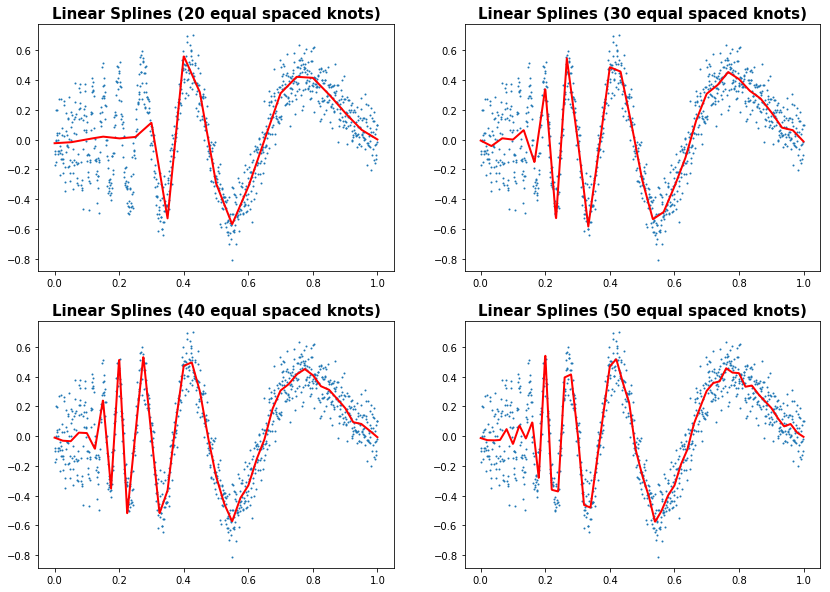

In [13]:
linreg = LinearRegression()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
tau=np.linspace(0,1,21)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,0].plot(x, y, 'o', MarkerSize=1)
axs[0,0].plot(x, yfit, color='red', LineWidth=2)
axs[0,0].set_title('Linear Splines (20 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,31)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0,1].plot(x, y, 'o', MarkerSize=1)
axs[0,1].plot(x, yfit, color='red', LineWidth=2)
axs[0,1].set_title('Linear Splines (30 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,41)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,0].plot(x, y, 'o', MarkerSize=1)
axs[1,0].plot(x, yfit, color='red', LineWidth=2)
axs[1,0].set_title('Linear Splines (40 equal spaced knots)', fontsize=15, fontweight="bold")

tau=np.linspace(0,1,51)[1:-1]
xphi = PieceLinearSpline(x, tau)
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1,1].plot(x, y, 'o', MarkerSize=1)
axs[1,1].plot(x, yfit, color='red', LineWidth=2)
axs[1,1].set_title('Linear Splines (50 equal spaced knots)', fontsize=15, fontweight="bold")
plt.show()

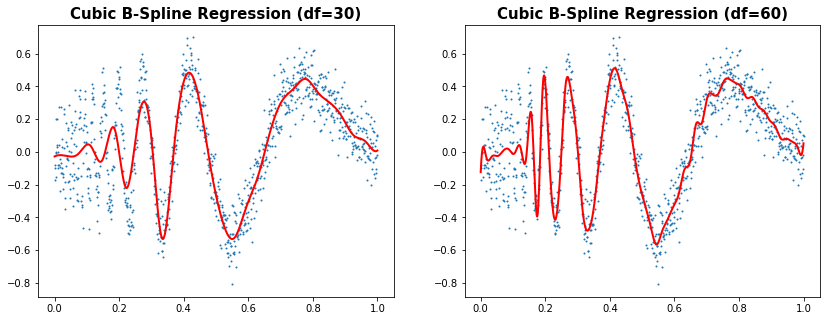

In [14]:
linreg = LinearRegression()
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
xphi = dmatrix("bs(x, df=30, degree=3, include_intercept=True) - 1", {"x": x})
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[0].plot(x, y, 'o', MarkerSize=1)
axs[0].plot(x, yfit, color='red', LineWidth=2)
axs[0].set_title('Cubic B-Spline Regression (df=30)', fontsize=15, fontweight="bold")

xphi = dmatrix("bs(x, df=60, degree=3, include_intercept=True) - 1", {"x": x})
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)
axs[1].plot(x, y, 'o', MarkerSize=1)
axs[1].plot(x, yfit, color='red', LineWidth=2)
axs[1].set_title('Cubic B-Spline Regression (df=60)', fontsize=15, fontweight="bold")
plt.show()

# Binning

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
pd.options.mode.chained_assignment = None

In [16]:
dat = load_iris()
df = pd.DataFrame(dat.data,columns=dat.feature_names)
df['target'] = dat.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Equal Width Binning

In [17]:
# All bins in each feature have identical widths.
est = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')

In [18]:
z = est.fit_transform(df['petal length (cm)'][:,np.newaxis])

In [19]:
print('Min: %.2f, Max: %.2f'%(df['petal length (cm)'].min(),df['petal length (cm)'].max()))
print(np.linspace(1,6.9,5+1))
print('Bin Edges:',est.bin_edges_[0])

Min: 1.00, Max: 6.90
[1.   2.18 3.36 4.54 5.72 6.9 ]
Bin Edges: [1.   2.18 3.36 4.54 5.72 6.9 ]


In [20]:
df['EWB petal length'] = z
df.loc[45:55,['petal length (cm)','EWB petal length']]

,petal length (cm),EWB petal length
45,1.4,0.0
46,1.6,0.0
47,1.4,0.0
48,1.5,0.0
49,1.4,0.0
50,4.7,3.0
51,4.5,2.0
52,4.9,3.0
53,4.0,2.0
54,4.6,3.0


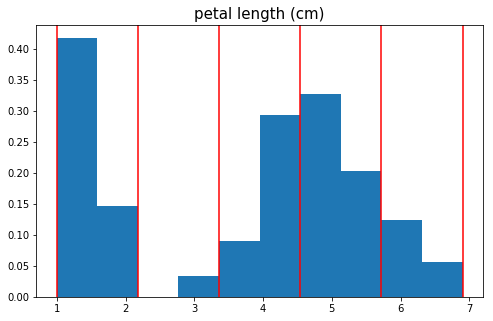

In [21]:
plt.figure(figsize=(8,5))
df['petal length (cm)'].hist(grid=False,density=True)
for x in est.bin_edges_[0]:
    plt.axvline(x,color='r')
plt.title('petal length (cm)',fontsize=15)
plt.show()

## Equal Frequency Binning

In [22]:
est = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
z = est.fit_transform(df['petal length (cm)'][:,np.newaxis])

In [23]:
est.bin_edges_

array([array([1.  , 1.5 , 3.9 , 4.64, 5.32, 6.9 ])], dtype=object)

In [24]:
np.quantile(df['petal length (cm)'].values,np.linspace(0,1,5+1))

array([1.  , 1.5 , 3.9 , 4.64, 5.32, 6.9 ])

In [25]:
df['EFB petal length'] = z
df.loc[45:55,['petal length (cm)','EFB petal length']]

,petal length (cm),EFB petal length
45,1.4,0.0
46,1.6,1.0
47,1.4,0.0
48,1.5,1.0
49,1.4,0.0
50,4.7,3.0
51,4.5,2.0
52,4.9,3.0
53,4.0,2.0
54,4.6,2.0


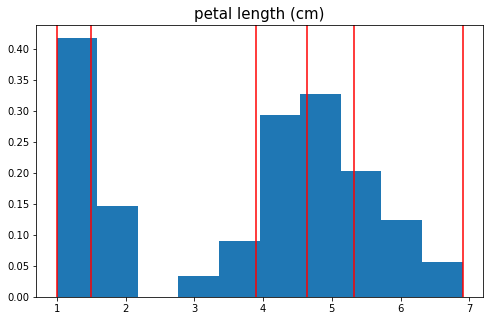

In [26]:
plt.figure(figsize=(8,5))
df['petal length (cm)'].hist(grid=False,density=True)
for x in est.bin_edges_[0]:
    plt.axvline(x,color='r')
plt.title('petal length (cm)',fontsize=15)
plt.show()

## Top-down Splitting by Information Value
We use the function in `scorecardpy` from [link](https://github.com/ShichenXie/scorecardpy). You can install the package by 
```
pip install scorecardpy
```

In [27]:
import scorecardpy as sc

In [28]:
# WOE binning only supports binary classification
# we extract the data frame with first two classes
df_binary = df.loc[df['target']<=1,:]

In [29]:
# Here Bad: label 1, Good: label 0
bins = sc.woebin(df_binary,y='target',x='sepal length (cm)')
bins['sepal length (cm)']

[INFO] creating woe binning ...


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,sepal length (cm),"[-inf,4.999999999999997)",21,0.21,20,1,0.047619,-2.995732,1.138378,3.958625,4.999999999999997,False
1,sepal length (cm),"[4.999999999999997,5.499999999999996)",30,0.30,25,5,0.166667,-1.609438,0.643775,3.958625,5.499999999999996,False
2,sepal length (cm),"[5.499999999999996,5.7999999999999945)",19,0.19,4,15,0.789474,1.321756,0.290786,3.958625,5.7999999999999945,False
3,sepal length (cm),"[5.7999999999999945,inf)",30,0.30,1,29,0.966667,3.367296,1.885686,3.958625,inf,False


In [30]:
# We modify the results for the simplicity of illustration.
breaks = bins['sepal length (cm)']['breaks'].values.astype(np.float)
breaks_ = np.insert(breaks,0,-np.inf)
bins['sepal length (cm)']['breaks'] = breaks.round(3).astype(str)
bins['sepal length (cm)']['bin'] = pd.cut(breaks_[:-1],breaks_,right=False)
bins['sepal length (cm)']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,sepal length (cm),"[-inf, 5.0)",21,0.21,20,1,0.047619,-2.995732,1.138378,3.958625,5.0,False
1,sepal length (cm),"[5.0, 5.5)",30,0.30,25,5,0.166667,-1.609438,0.643775,3.958625,5.5,False
2,sepal length (cm),"[5.5, 5.8)",19,0.19,4,15,0.789474,1.321756,0.290786,3.958625,5.8,False
3,sepal length (cm),"[5.8, inf)",30,0.30,1,29,0.966667,3.367296,1.885686,3.958625,inf,False


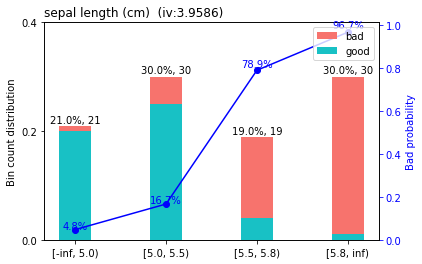

In [31]:
sc.woebin_plot(bins)
fig = plt.gcf()
fig.set_size_inches((6,4))
plt.show()

In [32]:
df_binary['IV sepal length'] = pd.cut(df_binary['sepal length (cm)'],breaks_,right=False)
df_binary.iloc[45:55,['sepal length' in column for column in df_binary.columns]]

,sepal length (cm),IV sepal length
45,4.8,"[-inf, 5.0)"
46,5.1,"[5.0, 5.5)"
47,4.6,"[-inf, 5.0)"
48,5.3,"[5.0, 5.5)"
49,5.0,"[5.0, 5.5)"
50,7.0,"[5.8, inf)"
51,6.4,"[5.8, inf)"
52,6.9,"[5.8, inf)"
53,5.5,"[5.5, 5.8)"
54,6.5,"[5.8, inf)"


## Bottom-up merging by ChiMerge Algorithm

In [33]:
# similarly we can use scorecardpy to conduct chimerge binning and report its WOE and IV
bins = sc.woebin(df_binary,y='target',x='sepal length (cm)',method='chimerge')
bins['sepal length (cm)']

[INFO] creating woe binning ...


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,sepal length (cm),"[-inf,5.499999999999996)",51,0.51,45,6,0.117647,-2.014903,1.571624,3.748096,5.499999999999996,False
1,sepal length (cm),"[5.499999999999996,5.7999999999999945)",19,0.19,4,15,0.789474,1.321756,0.290786,3.748096,5.7999999999999945,False
2,sepal length (cm),"[5.7999999999999945,inf)",30,0.30,1,29,0.966667,3.367296,1.885686,3.748096,inf,False


In [34]:
breaks = bins['sepal length (cm)']['breaks'].values.astype(np.float)
breaks_ = np.insert(breaks,0,-np.inf)
bins['sepal length (cm)']['breaks'] = breaks.round(3).astype(str)
bins['sepal length (cm)']['bin'] = pd.cut(breaks_[:-1],breaks_,right=False)
bins['sepal length (cm)']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,sepal length (cm),"[-inf, 5.5)",51,0.51,45,6,0.117647,-2.014903,1.571624,3.748096,5.5,False
1,sepal length (cm),"[5.5, 5.8)",19,0.19,4,15,0.789474,1.321756,0.290786,3.748096,5.8,False
2,sepal length (cm),"[5.8, inf)",30,0.30,1,29,0.966667,3.367296,1.885686,3.748096,inf,False


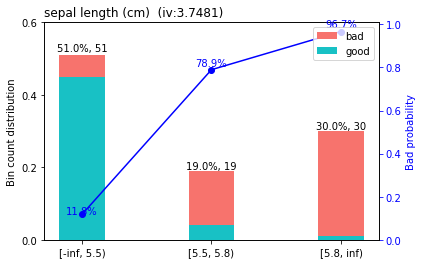

In [35]:
sc.woebin_plot(bins)
fig = plt.gcf()
fig.set_size_inches((6,4))
plt.show()

In [36]:
df_binary['ChiMerge sepal length'] = pd.cut(df_binary['sepal length (cm)'],breaks_,right=False)
df_binary.iloc[45:55,['sepal length' in column for column in df_binary.columns]]

,sepal length (cm),IV sepal length,ChiMerge sepal length
45,4.8,"[-inf, 5.0)","[-inf, 5.5)"
46,5.1,"[5.0, 5.5)","[-inf, 5.5)"
47,4.6,"[-inf, 5.0)","[-inf, 5.5)"
48,5.3,"[5.0, 5.5)","[-inf, 5.5)"
49,5.0,"[5.0, 5.5)","[-inf, 5.5)"
50,7.0,"[5.8, inf)","[5.8, inf)"
51,6.4,"[5.8, inf)","[5.8, inf)"
52,6.9,"[5.8, inf)","[5.8, inf)"
53,5.5,"[5.5, 5.8)","[5.5, 5.8)"
54,6.5,"[5.8, inf)","[5.8, inf)"
